In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from scipy.spatial.distance import cdist
from sklearn.decomposition import PCA


def drawSilhouette(X, n_MaxK):
    sil = []
    K = range(2, n_MaxK)
    for k in K:
        kmeans = KMeans(n_clusters = k).fit(X)
        labels = kmeans.labels_
        sil.append(silhouette_score(X, labels, metric = 'euclidean'))
        
    # Plot the silhouette_score
    plt.plot(K, sil, 'bx-')
    plt.xlabel('k')
    plt.ylabel('silhouette score')
    plt.title('The Silhouette Method showing the optimal k')
    plt.show()


def clusterByKMean(X,k,col_cluster_name):
    kmeans = KMeans(n_clusters = k).fit(X)
    pred = kmeans.labels_
    return pd.concat([X,pd.DataFrame({col_cluster_name:pred})], axis=1)


def drawElbow(X,n_MaxK):
    K = range(1,n_MaxK)
    W = []
    for k in K:
        kmeans = KMeans(n_clusters = k).fit(X)
        labels = kmeans.labels_
        W.append(sum(np.min(cdist(X, kmeans.cluster_centers_, 'euclidean'), axis=1)) / np.shape(X)[0])
        
    # Plot the elbow
    plt.plot(K, W, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Distortion')
    plt.title('The Elbow Method showing the optimal k')
    plt.show()

In [3]:
a_Age = [15,15,16,19,19,20,20,21,22,28,35,40,41,42,43,44,60,61,65]
df = pd.DataFrame({'Age':a_Age})

In [4]:
clusterByKMean(df[['Age']],3,'cluster')

,Age,cluster
0,15,1
1,15,1
2,16,1
3,19,1
4,19,1
5,20,1
6,20,1
7,21,1
8,22,1
9,28,1


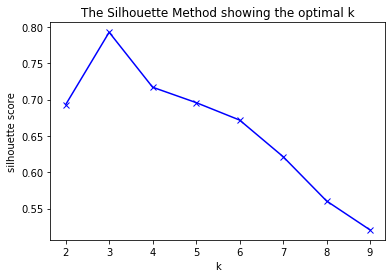

In [5]:
drawSilhouette(df[['Age']],10)

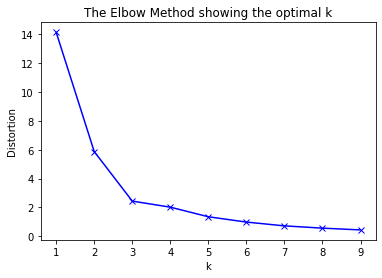

In [6]:
drawElbow(df[['Age']],10)

In [11]:
df_wh = pd.read_csv('weight-height.csv')
df_wh = pd.get_dummies(df_wh)
df_wh.head()

,Height,Weight,Gender_Female,Gender_Male
0,73.847017,241.893563,0,1
1,68.781904,162.310473,0,1
2,74.110105,212.740856,0,1
3,71.730978,220.042470,0,1
4,69.881796,206.349801,0,1


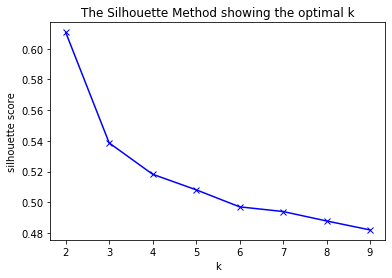

In [12]:
drawSilhouette(df_wh,10)

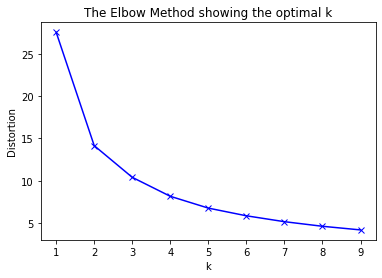

In [13]:
drawElbow(df_wh,10)

In [14]:
df_wh_clustered = clusterByKMean(df_wh,2,'cluster')
df_wh_clustered

,Height,Weight,Gender_Female,Gender_Male,cluster
0,73.847017,241.893563,0,1,0
1,68.781904,162.310473,0,1,0
2,74.110105,212.740856,0,1,0
3,71.730978,220.042470,0,1,0
4,69.881796,206.349801,0,1,0
...,...,...,...,...,...
9995,66.172652,136.777454,1,0,1
9996,67.067155,170.867906,1,0,0
9997,63.867992,128.475319,1,0,1
9998,69.034243,163.852461,1,0,0


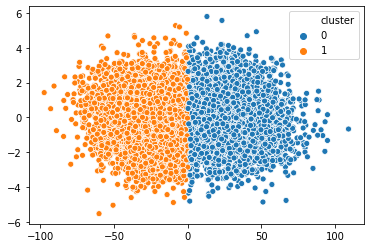

In [15]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(df_wh_clustered)
sns.scatterplot(x = principalComponents[:,0],
                y = principalComponents[:,1],
                hue = df_wh_clustered['cluster'])